#Math 123 Final Project: Unsupervised learning GTSRB
##Hailey Mckelvie, Oliver Feder, Brian Strothman


For our final project, we wanted to analyze how accurate unsupervised learning pipelines can classify images. We selected the German Traffic Sign Recognition Dataset/ This dataset has a number of important application, but has a lot of noise within the raw data. 

We created two different unsupervised learning methods for distinguishing different street signs: Gaussian Mixture Model(GMM) and Kmeans clustering. We intended for there to be 43 clusters formed, one for each type of sign. Before, labeling the images with GMM and Kmeans, the images were preprocessed to increase the accuracy of the assignments. Additionally, Principle Componenet Analysis was done on each preprocessed image with 50 componenets.

We used the training GTSRB to access the accuracy of the GMM and KMeans assignments. Ulitmetly, the majority vote method is used to determine which cluster for each method corresponds to the given signs. 

The reason predicting street signs is so imperitive for companies and government to be able to do is the coming influx of self-driving cars. We have long known that self-driving cars are coming, the only question is when.If self-driving cars fail to predict and identify street signs, it could lead to avoidable accidents. The more accurate predictors of street signs are, the safer self driving cars will be. 



#About the Data: German Traffic Sign Recognition Dataset (GTSRD)

GTSRB is a dataset of about 50,000 images, about 40,000 training images and 12,000 testing images, that contains 43 different classes of traffic signs. The dataset is often used in Convolutional Neural Networks (CNN). With CNN, the model can be trained to predict new signs. 

The images present in the dataset contain much noise. For example, there is graffeti on many signs and different levels of quality of images. The amount of variance in both quality and the image itself raise a number of issues in recognizing the  signs. 

The images below shows the types of signs present in the dataset. 


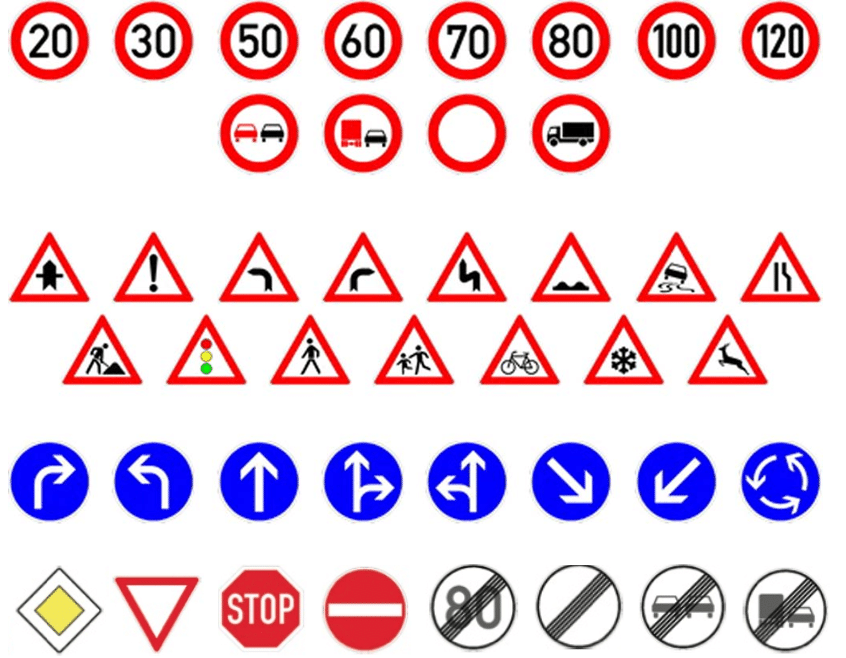

img source: https://www.researchgate.net/figure/The-total-43-classes-in-GTSRB-From-top-to-bottom-there-are-four-categories_fig1_322945549  


Files

*   Train.zip - compressed training data folder, has 43 sub-directories of each type of sign
*   Test.zip - compressed testing data, the testing data is unlabeled
*   Preprocessed.zip - compressed preprocessed training images, program can compute preprocessed images, they are already computed for runtime



#Predictions:

We expect that the images below will be clustered in following groups of different signs. Since there is so much noise in the data, we do not expect GMM or KMeans to be an accurate method for classifying a sign. As a result, there will like be a low accuracy rate. 

The images below are the images we recieve after preprocessing. We expect the most accurate results in clustering from sign 12 because it is diverges so greatly from the other image in the data set. The sign that is colored in a bright yellow hue unlike any other sign in the dataset. If we run our alogorithms correctly, we expect signs which are unique (though perhaps not quite as unique as sign 12), to cluster seperately from other more similiar images. 

expected clusters |  | | | | | | |  | |
---| ---|  ---| ---|  ---|   ---| ---| ---| ---| ---|
signs 0 - 5 | 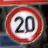| 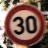 | 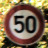 |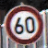 |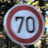 | 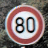
sign 6, 32,  41-42 | 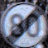 |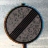|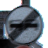 | 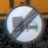
sign 7 - 8 |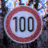 | 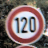
sign 9 - 10  | 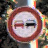 | 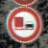
sign 11, 18, 21-25, 27, 30 | 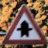 | 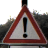 | 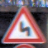 | 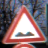 | 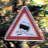 | 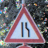 | 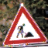|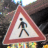 | 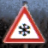
sign 12  | 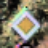
sign 13,15 | 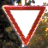 | 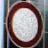
sign 14  | 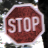
sign 16 | 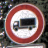
sign 17 | 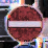
sign 19 - 20, 28-29, 31 | 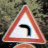 | 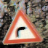 | 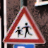 | 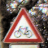 | 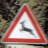
sign 26 | 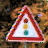
sign 33 - 40 | 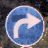 | 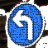 | 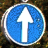|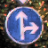 | 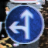 | 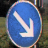 | 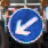 | 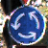



#Modules:

##Preprocessing the images


The images are preprocessed to optimize the clustering accuracy and standardized to 48 x 48 pixels in size. Additionally, we used the skimage library to enhance each image so we can use it more accurately. The preprocess image function is adapted from the following site: https://software.intel.com/content/www/us/en/develop/articles/tutorial-building-and-training-the-traffic-image-model.html 

In [ ]:
import skimage
from skimage import io
import numpy as np
import os
import pandas as pd

IMG_SIZE = 48
FEATURES_FILE = 'preprocessed_features.npy'

In [ ]:
def traverse(path): 
    direct = os.listdir(path+"/Train")
    for d in direct:
        dir_path = path+"/Processed/"+ d
        images = os.listdir(path+"/Train/"+ d)
        if not os.path.isdir(dir_path):
            os.mkdir(dir_path) 
        for i in images :  
            img_path = dir_path +"/" + i
            src_path = path+"/Train/"+ d +"/" + i
            if not os.path.isfile(img_path) :
              fixed_img = preprocess_img(io.imread(src_path))
              io.imsave(img_path, img_as_ubyte(fixed_img))
              
def preprocess_img(img):
    hsv = skimage.color.rgb2hsv(img)
    hsv[:,:,2] = skimage.exposure.equalize_hist(hsv[:,:,2])
    img = skimage.color.hsv2rgb(hsv)

    min_side = min(img.shape[:-1])
    center = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]
    img = skimage.transform.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.rollaxis(img,-1, -1)
    return img

def load_preprocessed(path):
    features = []
    dirs = os.listdir(path)
    labeled_images = pd.DataFrame(columns=['path', 'expected_label'])
    for d in dirs:
        images = os.listdir(path+"/"+d)
        for img in images:
            curr_img = pd.DataFrame({'path': [path + "/" + d + "/"+ img], 'expected_label': [int(d)]})
            labeled_images = labeled_images.append(curr_img, ignore_index=True)
            img = io.imread(path + "/" + d + "/"+ img)
            features.append(img.flatten())
    arr_features = np.array(features)
    with open(FEATURES_FILE, 'wb') as file:
        np.save(file, arr_features)
    return labeled_images

### Comparing plots of the raw images and plots of the preprocessed images



Running the code below will produce a figure that shows the difference in images before and after preprocessing. Some of the changes in images are shown below. We believe that precossing the images will make our alogorithms have a higher accuracy, although even with preprocessing the images are still of quite a low quality. 

Raw Images | Preprocessed Images
       --- | ---
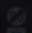 | 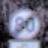 
00023_00000_00007.png | 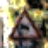
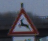|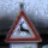
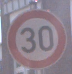|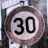
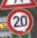|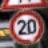






In [ ]:
#code from https://rosettacode.org/wiki/Percentage_difference_between_images#Python
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def percent_difference(i1, i2):
    i1 = i1.resize((IMG_SIZE,IMG_SIZE))
    assert i1.mode == i2.mode, "Different kinds of images."
    assert i1.size == i2.size, "Different sizes."
  
    pairs = zip(i1.getdata(), i2.getdata())
    if len(i1.getbands()) == 1:
        # for gray-scale jpegs
        dif = sum(abs(p1-p2) for p1,p2 in pairs)
    else:
        dif = sum(abs(c1-c2) for p1,p2 in pairs for c1,c2 in zip(p1,p2))
 
    ncomponents = i1.size[0] * i1.size[1] * 3
    return (dif / 255.0 * 100) / ncomponents

def all_difference(path):
    differences = []
    dirs = os.listdir(path+"/Train")
    for d in dirs:
        images = os.listdir(path+"/Train/"+d)
        for img in images: 
          i1 = Image.open(path+"/Train/"+d+"/"+img)
          i2 = Image.open(path+"/Processed/"+d+"/"+img)
          differences.append(percent_difference(i1,i2))
    diff_arr = np.array(differences)
    return diff_arr

In [ ]:
path = os.getcwd()
diff_arr = all_difference(path)

FileNotFoundError: ignored

In [ ]:
def plot_diff(diff_arr):
    length = np.size(diff_arr)
    x = np.arange(start=0, stop=length, step=1)
    plt.scatter(x, diff_arr, s=2)
    plt.title("Differences after Preprocessing Images")  
    plt.show()

In [ ]:
plot_diff(diff_arr)

NameError: ignored

## Perform PCA 

We used Principle Componenet Analysis to reduce the number of features in each image. PCA reduces the number of dimensions in the data while preserving the essence of the image. We want to find variables which maximiaze variance and are uncorrelated to each other. The more components used in PCA, the more accurate the image will be. However, after a good number of components, adding more components to PCA will make little differnce in the result of the image.

Here, we did PCA with 50 componenets, which we think is enough components to accurately display the images.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
def pca_features():
    with open(FEATURES_FILE, 'rb') as file:
        img_features = np.load(file)
        scaler = StandardScaler()    
        scaler.fit(img_features)
        img_features = scaler.transform(img_features)
        pca = PCA(n_components=50)  
        img_features = pca.fit_transform(img_features)
        return img_features   

## Perform GMM on data


We performed the unsupervised learning model of Gaussian Mixture Model on the data. Each cluster has a mean which defines its center, a covariance which determines the width, and a mixing probabibility which defines how large or small the function is. 

In [ ]:
import numpy as np
import os
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

NUM_CLUSTER = 43 #we know this because there are 43 types of signs

In [ ]:
def gmm(img_features):
    gmm = GaussianMixture(n_components=NUM_CLUSTER, covariance_type='full')
    gmm = gmm.fit(img_features)
    labels = gmm.predict(img_features)
    silhouette = silhouette_score(img_features, labels)
    return labels, silhouette

### Analysis: Use Silhouette Score to Quantify accuracy
Silhouette score quantifies the similarity of sign to the other signs in its cluster. With GMM, the silhouette score found is -0.03634109623051381, which idicates that the model is inaccurate.

## Perform K-Means on the data


Since we did not recieve good results from GMM, we also ran the unsupervisd learning Kmeans on our data set. In Kmeans we create a number of centroids, and then assign each data point to one of the centroids.


In [ ]:
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

NUM_CLUSTER = 43 #we know this because there are 43 types of signs

In [ ]:
def kmeans(img_features):
    kmeans = KMeans(init='k-means++', n_clusters=NUM_CLUSTER, random_state=0)
    labels = kmeans.fit(img_features).predict(img_features)
    silhouette = silhouette_score(img_features, labels)
    return labels, silhouette

### Analysis: Use Silhouette Score to Quantify Accuracy
silhouette score quantifies the similarity of sign to the other signs in its cluster. With Kmeans, the Silhouette Score found is 0.05698770269552276, which idicates that the Kmeans model is also inaccurate.

##Analyze Labels

The module below peforms analysis that compares the GMM and Kmeans clustering methods. Majority voting is used to select the respective cluster for each sign. Note that with the majority voting method, there may multiple signs that are assigned to each cluster. Thus, it is difficult to quantify the exact accuracy of each clustering method. 

Additionally, each a bar graph for each assignment is formed. The figures display the counts of each sign that are group in the cluster. 

In [ ]:
def analyze_labels(labeled_images, gmm_labels, kmeans_labels):
    gmm_assignment = pd.DataFrame(gmm_labels, columns=['gmm_label'])
    kmeans_assignment = pd.DataFrame(kmeans_labels, columns=['kmeans_label'])

    labeled = labeled_images.join(gmm_assignment)
    labeled = labeled.join(kmeans_assignment)
    labeled.to_csv('expected_unsupervised_labels.csv', index=False)

    voted_label = pd.DataFrame(columns=['folder','gmm_label','kmeans_label'])
    for i in range(NUM_CLUSTER):
        curr_label = labeled.loc[labeled['expected_label'] == i]
        assigned_gmm = labeled.loc[labeled['gmm_label'] == i]
        assigned_kmeans = labeled.loc[labeled['kmeans_label'] == i]

        if not os.path.isdir('expected_cluster/') :
            os.mkdir('expected_cluster') 
        if not os.path.isdir('gmm_cluster/'):
            os.mkdir('gmm_cluster')
        if not os.path.isdir('kmeans_cluster/'):
            os.mkdir('kmeans_cluster')

        curr_label.to_csv(('expected_cluster/clustering_sign_%d.csv'%(i)), index=False)
        assigned_gmm.to_csv(('gmm_cluster/gmm_cluster_%d.csv'%(i)), index=False)
        assigned_kmeans.to_csv(('kmeans_cluster/kmeans_cluster_%d.csv'%(i)), index=False)

        curr_vote = get_votes(curr_label, i)
        voted_label = voted_label.append(curr_vote, ignore_index=True)
        
    voted_label.to_csv('voted_label_per_method.csv', index=False)


In [ ]:
def get_votes(curr_label, i):
    gmm_vote = curr_label['gmm_label'].mode()
    gmm_vote = gmm_vote.to_numpy()

    kmeans_vote = curr_label['kmeans_label'].mode()
    kmeans_vote = kmeans_vote.to_numpy()
    curr_vote = pd.DataFrame({'folder': [int(i)], 'gmm_label': [gmm_vote[0]], 'kmeans_label': [kmeans_vote[0]]})
    return curr_vote

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [ ]:
def graph_all_clusters() :
    pp_gmm = PdfPages('gmm_cluster_graph.pdf')
    pp_kmeans = PdfPages('kmeans_cluster_graph.pdf')
    for i in range(NUM_CLUSTER):
      cluster_graph(('gmm_cluster/gmm_cluster_%d.csv'%(i)), i, pp_gmm, "gmm")
      cluster_graph(('kmeans_cluster/kmeans_cluster_%d.csv'%(i)), i, pp_kmeans, "kmeans")
    pp_gmm.close()
    pp_kmeans.close()

def cluster_graph(filename, cluster_num, pp, cluster_type):
    cluster = pd.read_csv(filename)
    del cluster['gmm_label']
    del cluster['kmeans_label']
    counts = cluster['expected_label'].value_counts()
    ax = counts.plot.bar(title=("%s cluster %d"%(cluster_type, cluster_num)))
    plt = ax.get_figure()
    plt.savefig(pp, format='pdf')

##Implimentation

Below is the driver code that calls each module. Note many of the figures that are produced are written to files. Additionally, the clustering assignments are written to csv files. 

In [ ]:
path = os.getcwd()
# traverse(path)
labeled_images = load_preprocessed(path + "/Processed") 

In [ ]:
img_features = pca_features()
features_df = pd.DataFrame(img_features)
labeled_features = labeled_images.join(features_df)

In [ ]:
gmm_labels, gmm_score = gmm(img_features)

In [ ]:
kmeans_labels, kmeans_score = kmeans(img_features)

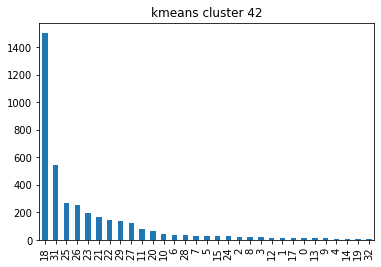

In [ ]:
analyze_labels(labeled_images, gmm_labels, kmeans_labels)
graph_all_clusters()

#Analysis: Compare GMM and K-Means results

##Labels Generated Through Gaussian Mixture Model Clustering

| well clustered |  | | | |
|---|  ---| ---| ---| ---|
| 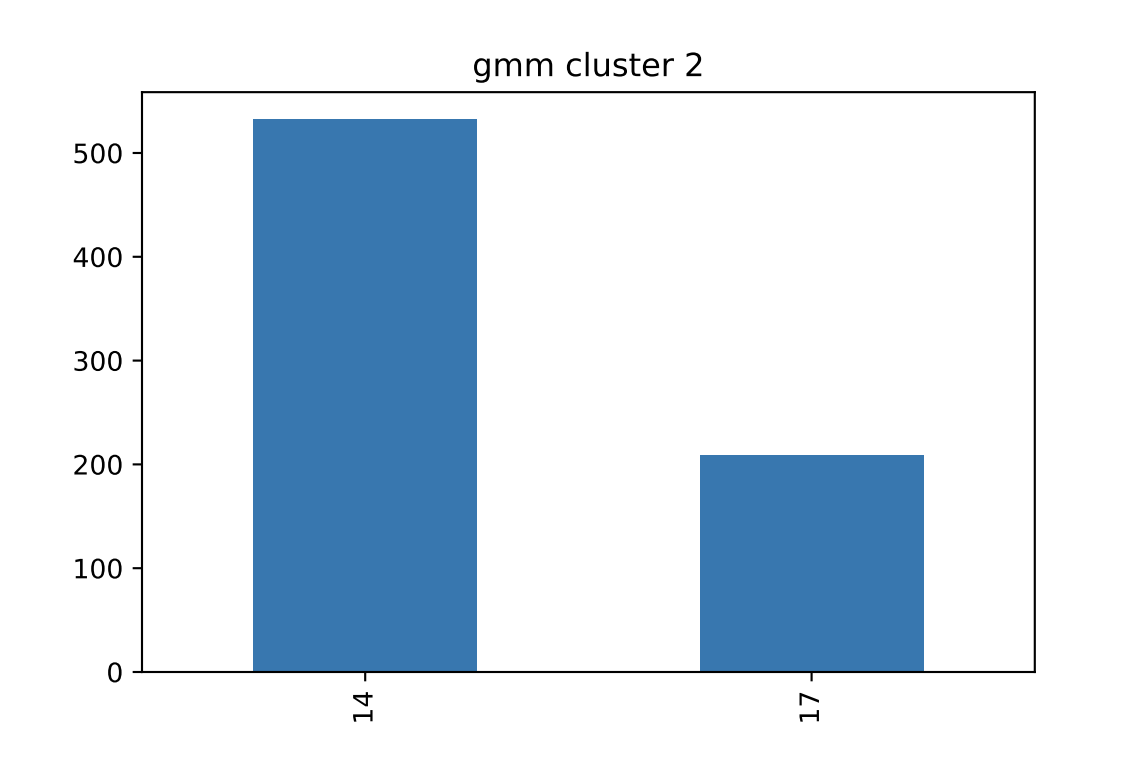    | 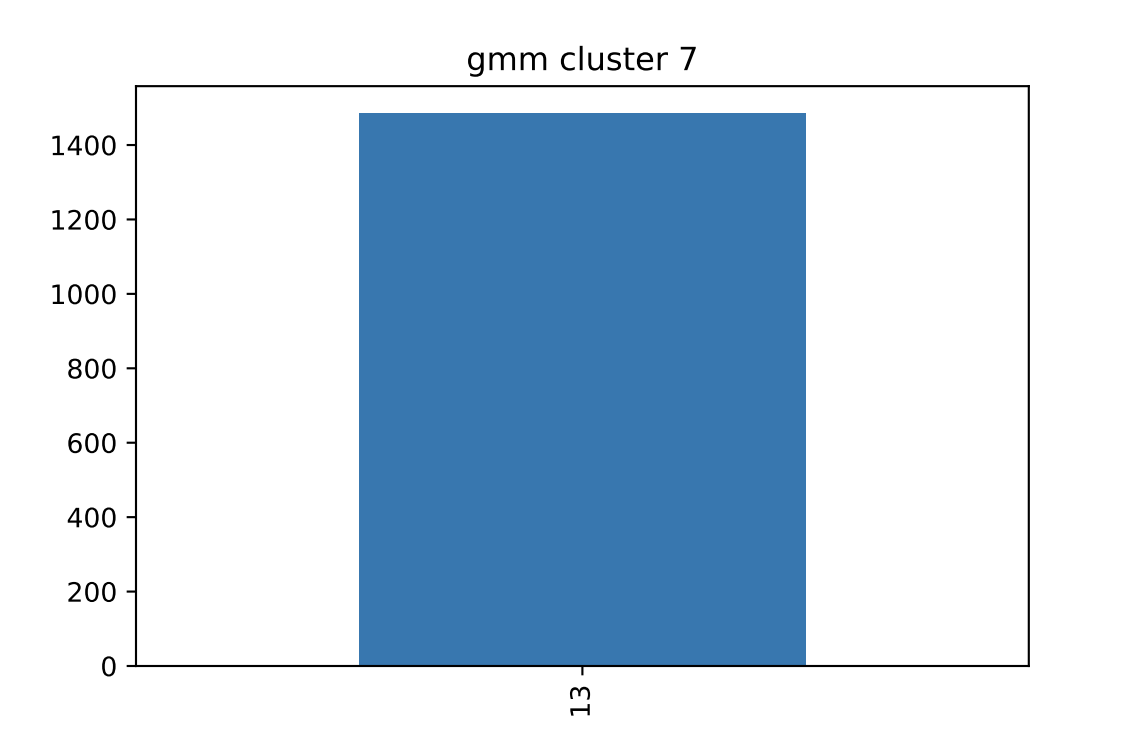 |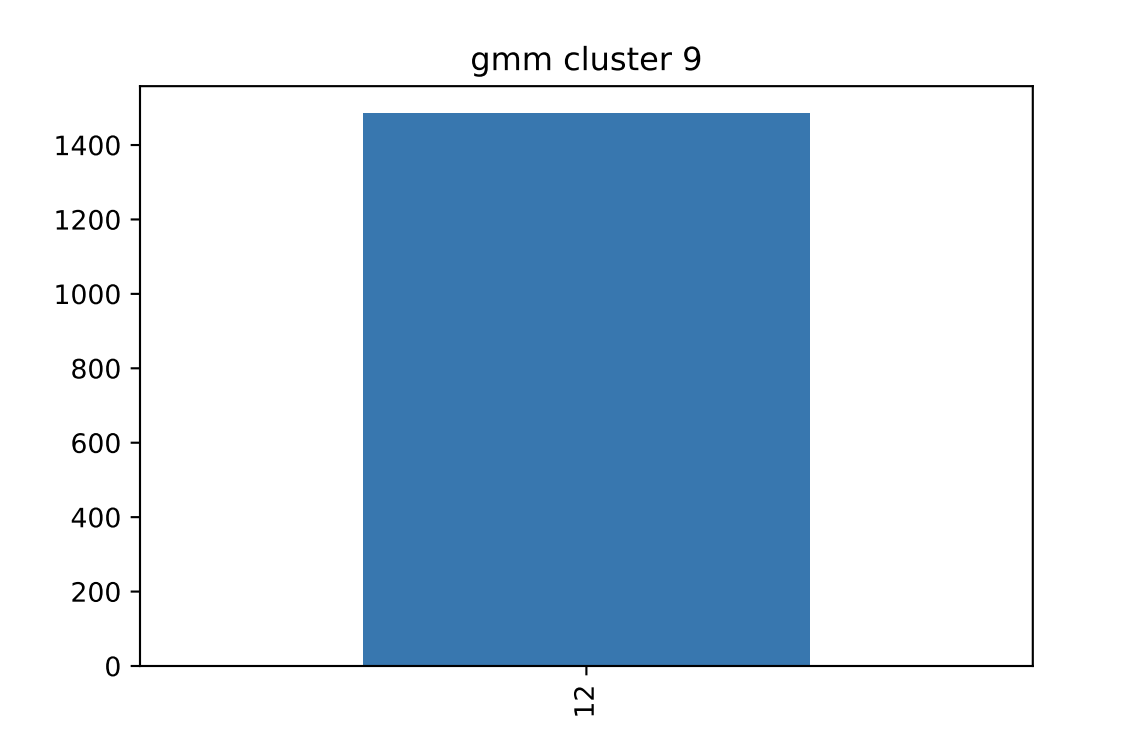 | 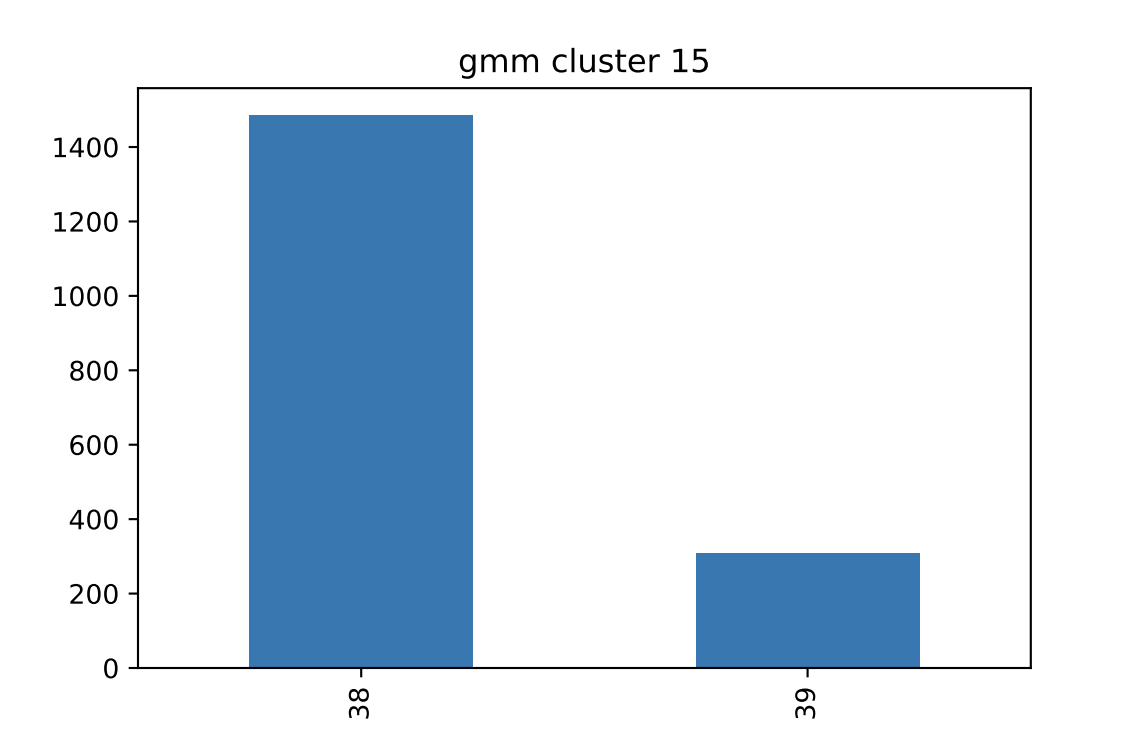 | 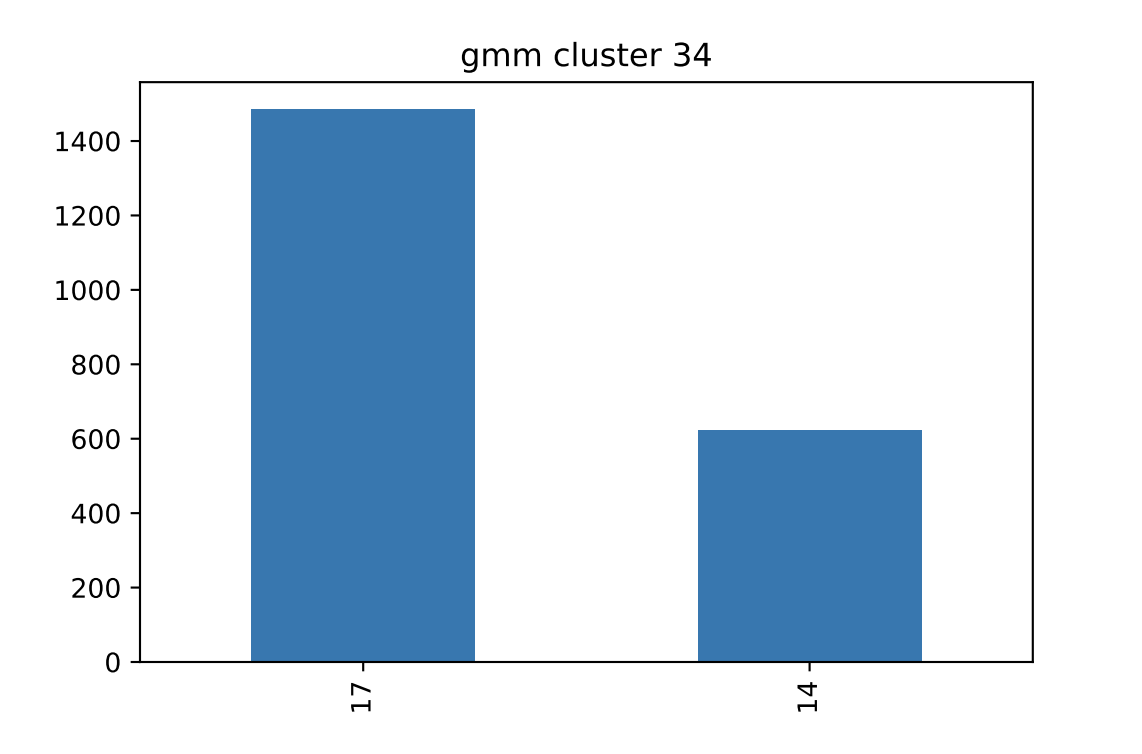 | 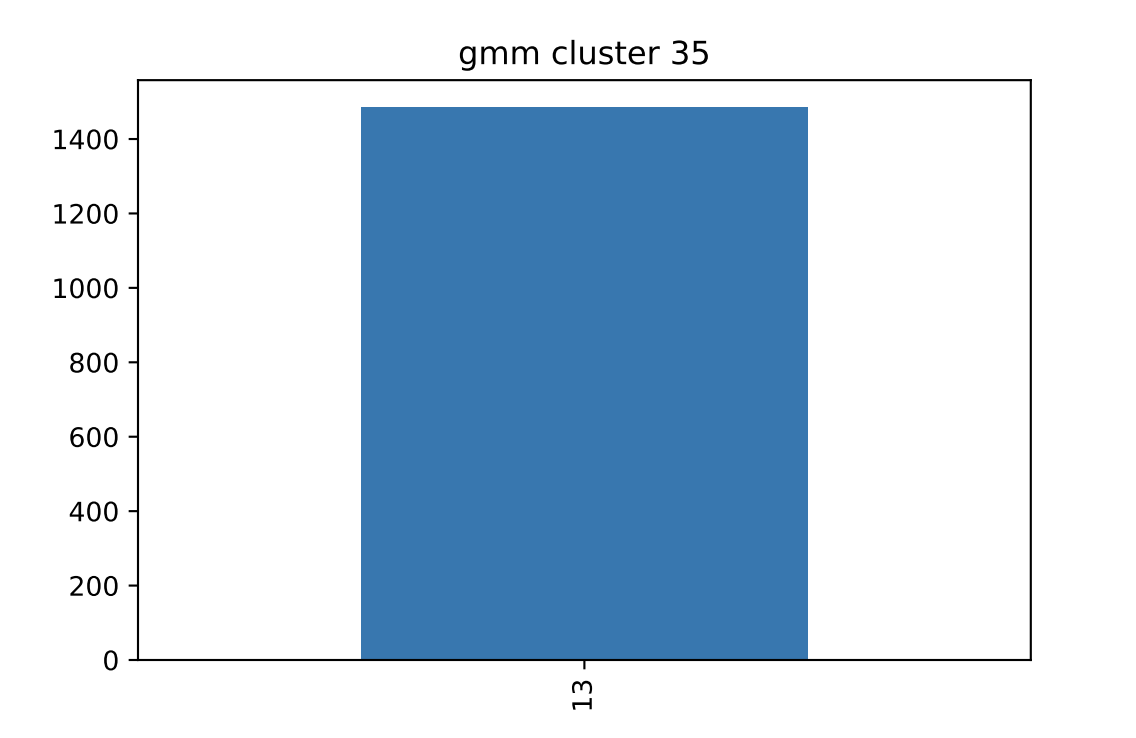| 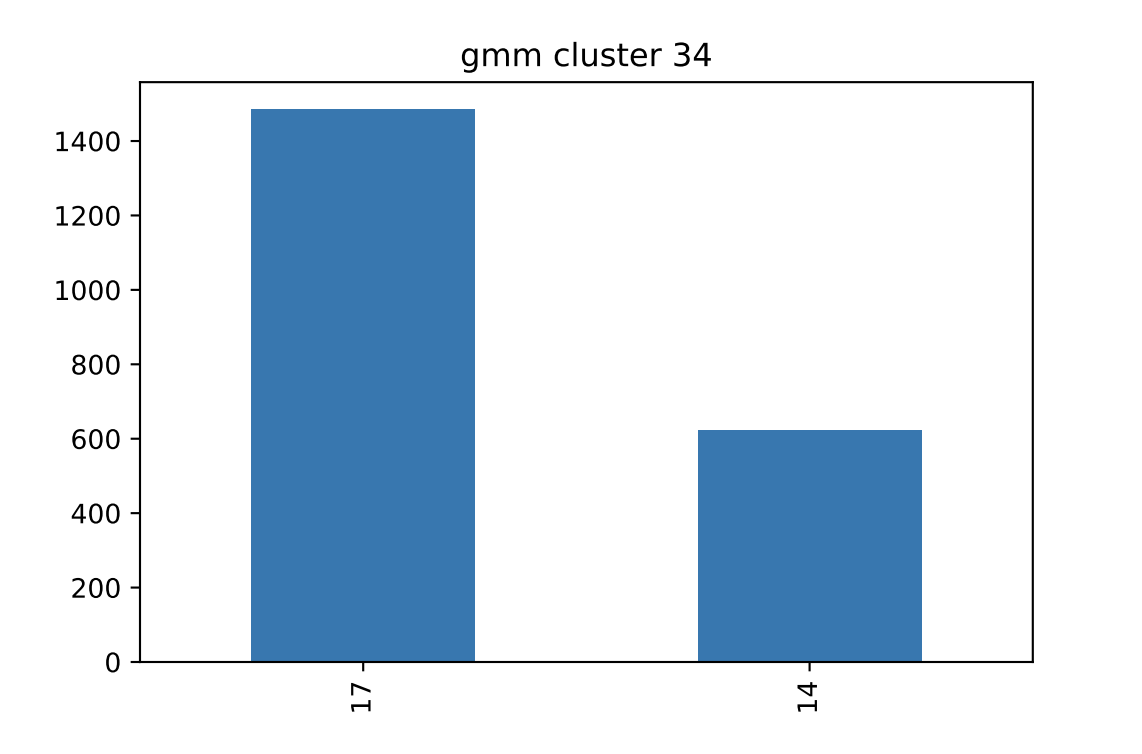 | 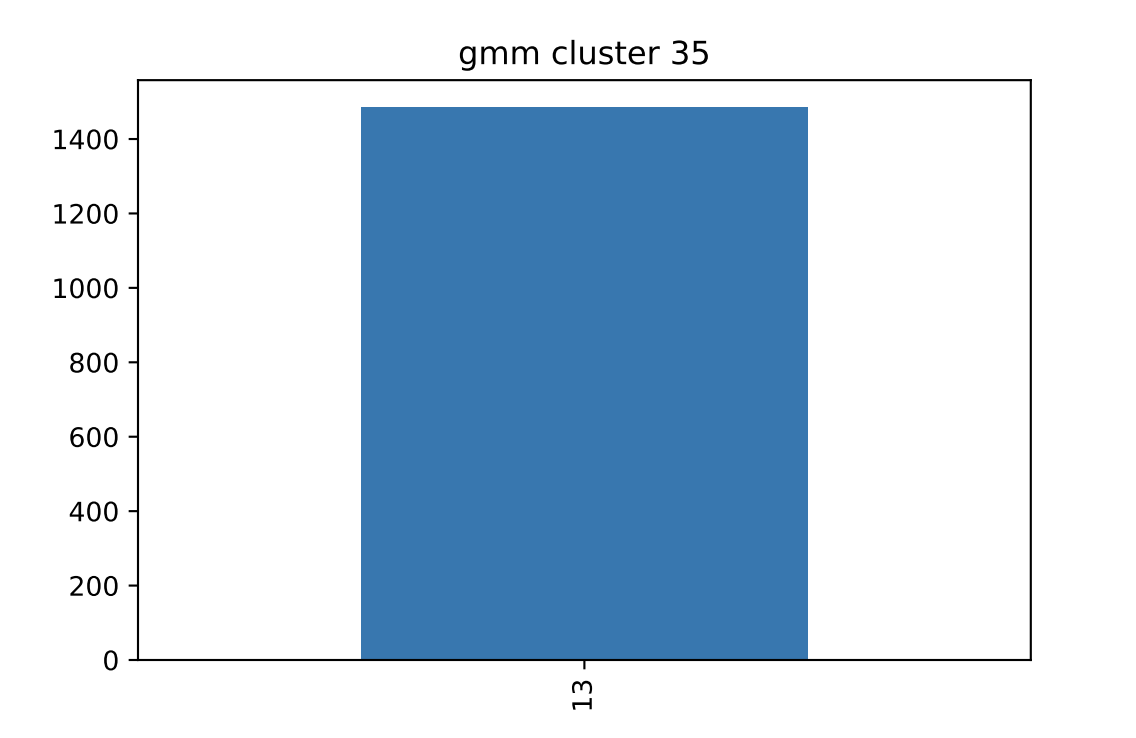
14 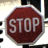 |  13 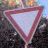 |    12 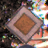 | 38 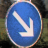 | 17 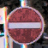 |
17 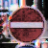 |     | | 39 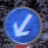 | 14 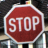 |

###Signs that GMM method clusters together (using the majority vote approach)

cluster | | | | | | | |
---|---|---|---| ---| ---| ---| ---|
3 |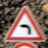 | 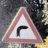 |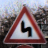 | 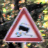|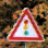
11| 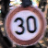 | 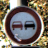
12|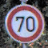 | 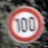 | 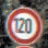
15| 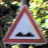 | 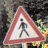
16| 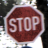 | 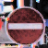
17|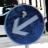 | 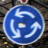
18| 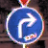 | 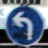 | 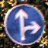 | 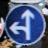
26| 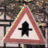 | 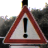|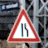 | 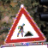|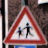 | 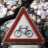
33| 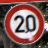 | 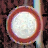
37| 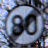| 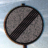 | 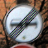 | 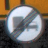

##Labels Generated Through Kmeans Clustering

###Kmeans images clustered together (using the majority vote approach)

clusters | | | | | | | |
---| ---|---|---| ---| ---| ---| ---|
 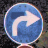 | 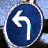 | 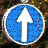 |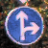 | 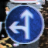 | 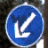 | 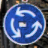
 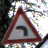 | 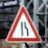 | 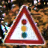 | 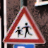 | 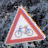 
 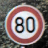 | 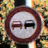 | 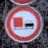 | 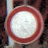
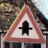 |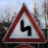|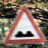 | 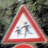
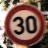 | 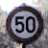
 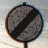 |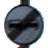 |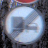
 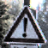 | 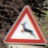
 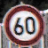 | 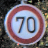 | 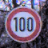 | 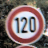

| well clustered | | | | |
|---| ---| ---| ---| ---|
| 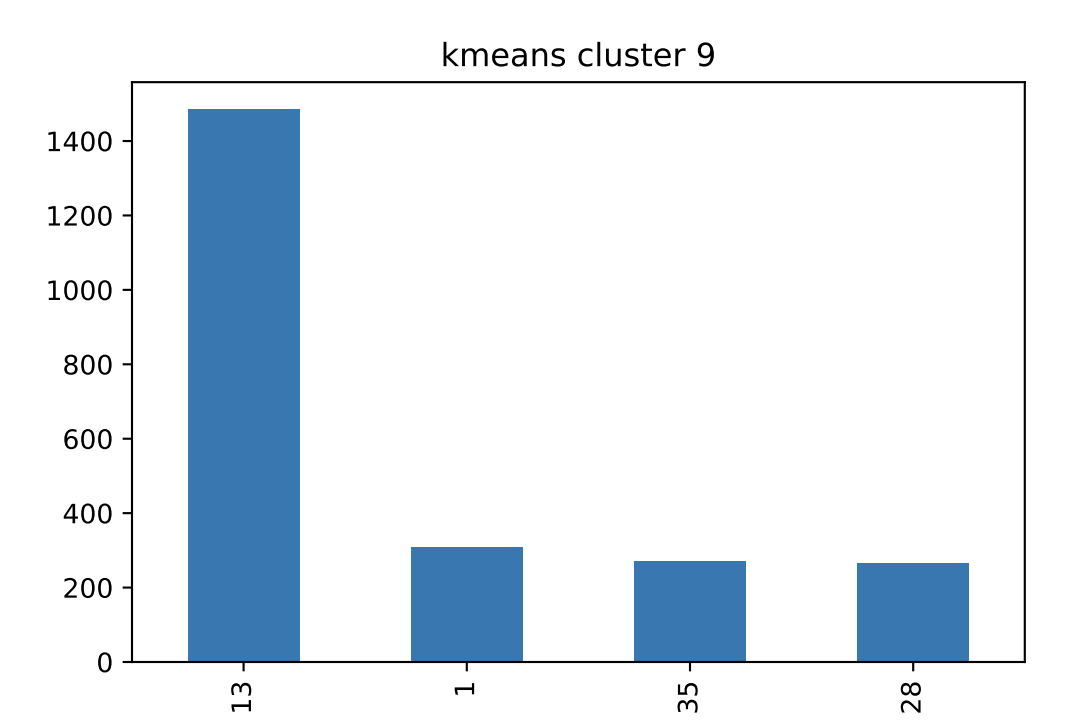 | 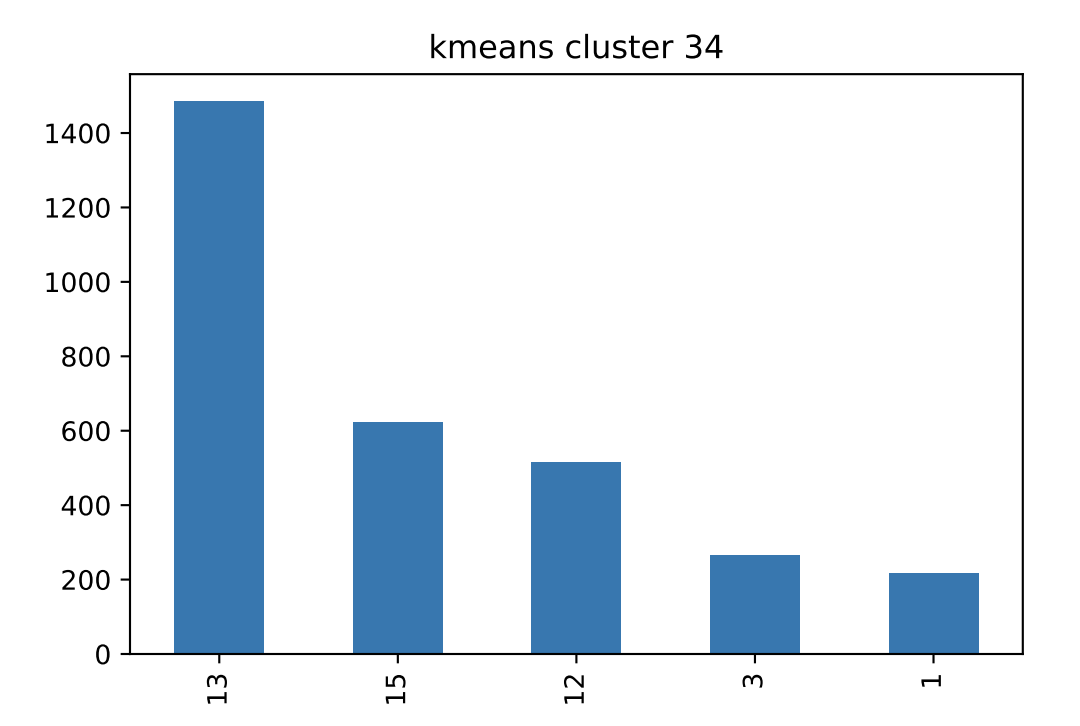 | 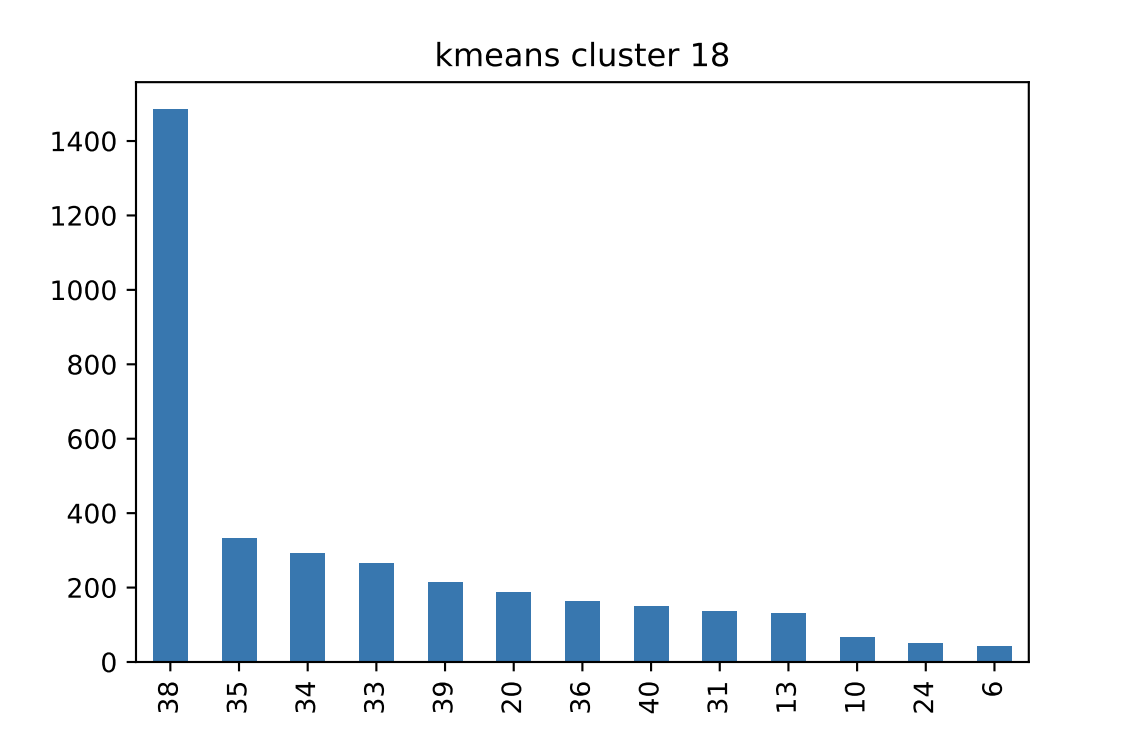 | 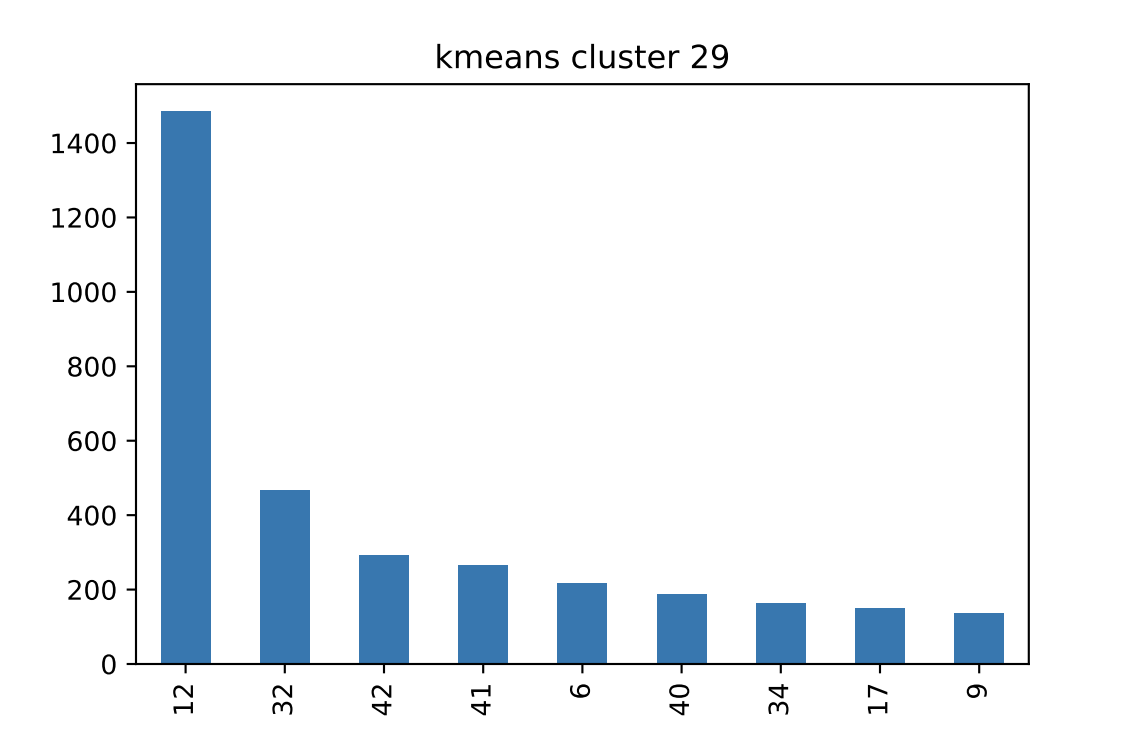 | 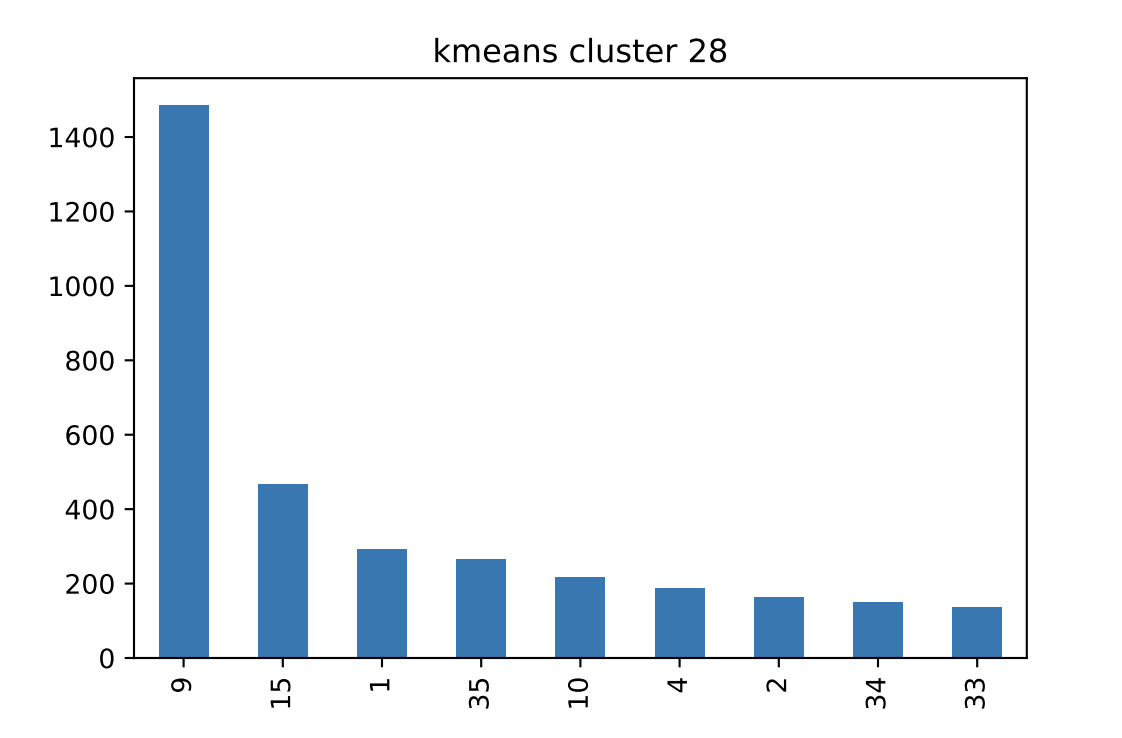 | 
|13 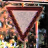 | 13 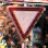 | 38 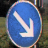 | 12 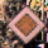 | 9 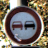 |
|1 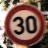 | 15 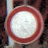 |
|35 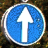 |12 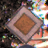 |
|28 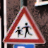 | 3 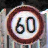 |
|   |  1 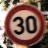 |

#Overall, GMM appears to cluster more accuratly than Kmeans, but Unsupervised Learning is not an effective method for classifying the GTSRB data because there is too much noise